In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [2]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize AdaBoost with a Decision Tree as base model
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=50, 
    learning_rate=1.0, 
    random_state=42
)

# Train the model
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [5]:
# Make predictions on test set
y_pred = adaboost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy:.4f}")

AdaBoost Accuracy: 0.8750


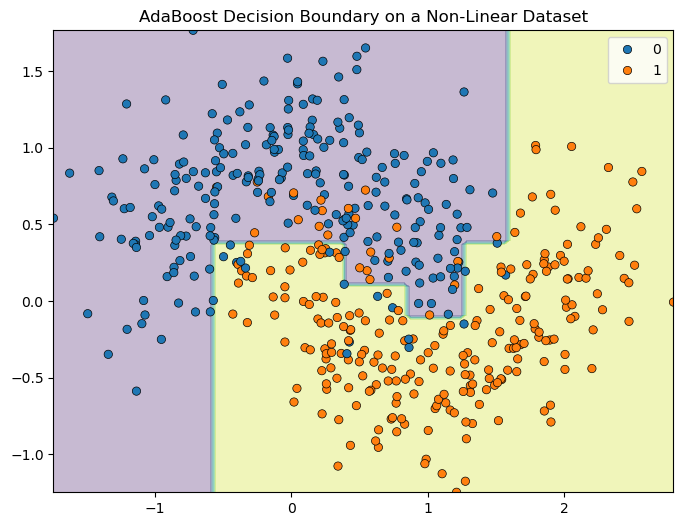

In [7]:
from sklearn.datasets import make_moons
import seaborn as sns

# Generate moon-shaped dataset
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost on new dataset
adaboost_moons = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=50, 
    learning_rate=1.0, 
    random_state=42
)
adaboost_moons.fit(X_train, y_train)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 100), 
                     np.linspace(X[:,1].min(), X[:,1].max(), 100))
Z = adaboost_moons.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, edgecolor="k")
plt.title("AdaBoost Decision Boundary on a Non-Linear Dataset")
plt.show()